#### 아래의 범죄에 대해 '성범죄 전체' 항목으로 묶어 시각화 하였다.
> '강력범죄(소계)', '강간', '강간·강제추행' '강도', '강제추행', '기타(강간·강제추행등)', '유사강간'.

> 참고로 2011년과 2012년의 '강간·강제추행' 항목은 2013년 이후 '기타(강간·강제추행등)' 항목으로 바뀌었음.

#### 아래의 없는 자료에 대해서는 0으로 처리.
> 2011년, 2012년: '강간', '강제추행', '기타', '유사강간' 범죄의 범죄자 수.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 폰트 적용
from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
crime_job = pd.read_csv('범죄자_직업.csv', encoding='euc-kr', thousands=',', header=3)
crime_job.head()

,No,자료시점,분류,분류.1,원자료,원자료.1,원자료.2,원자료.3,원자료.4,원자료.5,...,원자료.41,원자료.42,원자료.43,원자료.44,원자료.45,원자료.46,원자료.47,원자료.48,원자료.49,원자료.50
0,1,2011년,총계,총계,1815233.0,45031.0,5314.0,404.0,1134.0,5317.0,...,21040.0,1703.0,8983.0,1088.0,3904.0,4622.0,884.0,206241.0,311895.0,213556.0
1,2,2011년,강력범죄,강력범죄(소계),25346.0,691.0,73.0,2.0,20.0,111.0,...,240.0,24.0,59.0,13.0,38.0,53.0,19.0,1670.0,7320.0,1233.0
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,586.0,64.0,2.0,16.0,89.0,...,156.0,19.0,46.0,12.0,28.0,42.0,15.0,1242.0,3932.0,817.0
4,5,2011년,강력범죄,강제추행,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
crime_job.columns = ['No', '시점', '대분류', '범죄 분류', '총계', '전문직(소계)', '전문직(의사)', 
                     '전문직(변호사)', '전문직(교수)', '전문직(종교가)', '전문직(언론인)', '전문직(예술인)', 
                     '전문직(기타)', '공무원', '기타(소계)', '기타(학생)', '기타(주부)', '기타(전경.의경)', 
                     '기타(공익요원)', '기타(기타)', '피고용자(소계)', '피고용자(사립교원)','피고용자(사무원)', 
                     '피고용자(기술자)', '피고용자(점원)', '피고용자(공원)', '피고용자(운전사)', '피고용자(경비원)', 
                     '피고용자(외판원)', '피고용자(국공영기업체직원)', '피고용자(일반회사원)', '피고용자(금융기관직원)', 
                     '피고용자(유흥업종사자)', '피고용자(요식업종사자)', '피고용자(일용노동자)', '피고용자(기타)', 
                     '자영자(소계)', '자영자(농.임.수산업)', '자영자(광업)', '자영자(제조업)', '자영자(건설업)', 
                     '자영자(도.소매업)', '자영자(무역업)', '자영자(요식업)', '자영자(숙박업)', '자영자(유흥업)', 
                     '자영자(금융업)', '자영자(부동산업)', '자영자(의료보건업)', '자영자(차량정비업)', '자영자(노점)', 
                     '자영자(행상)', '자영자(기타)', '무직자', '미상']
crime_job.head(10)

,No,시점,대분류,범죄 분류,총계,전문직(소계),전문직(의사),전문직(변호사),전문직(교수),전문직(종교가),...,자영자(유흥업),자영자(금융업),자영자(부동산업),자영자(의료보건업),자영자(차량정비업),자영자(노점),자영자(행상),자영자(기타),무직자,미상
0,1,2011년,총계,총계,1815233.0,45031.0,5314.0,404.0,1134.0,5317.0,...,21040.0,1703.0,8983.0,1088.0,3904.0,4622.0,884.0,206241.0,311895.0,213556.0
1,2,2011년,강력범죄,강력범죄(소계),25346.0,691.0,73.0,2.0,20.0,111.0,...,240.0,24.0,59.0,13.0,38.0,53.0,19.0,1670.0,7320.0,1233.0
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,586.0,64.0,2.0,16.0,89.0,...,156.0,19.0,46.0,12.0,28.0,42.0,15.0,1242.0,3932.0,817.0
4,5,2011년,강력범죄,강제추행,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2011년,강력범죄,기타(강간·강제추행등),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2011년,강력범죄,유사강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2012년,총계,총계,1723815.0,45609.0,5481.0,465.0,1230.0,5143.0,...,18260.0,1581.0,8352.0,1032.0,3001.0,4197.0,640.0,201313.0,301343.0,68648.0
8,9,2012년,강력범죄,강력범죄(소계),23789.0,669.0,90.0,5.0,19.0,94.0,...,212.0,21.0,59.0,9.0,36.0,40.0,8.0,1645.0,6569.0,267.0
9,10,2012년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crime_job.set_index('범죄 분류', drop=True, append=False, inplace=True)
crime_job.drop(['No', '대분류', '총계'], axis=1, inplace=True)
crime_job.drop(['총계'], axis=0, inplace=True)

crime_job = crime_job.fillna(0)
crime_job.head()

,시점,전문직(소계),전문직(의사),전문직(변호사),전문직(교수),전문직(종교가),전문직(언론인),전문직(예술인),전문직(기타),공무원,...,자영자(유흥업),자영자(금융업),자영자(부동산업),자영자(의료보건업),자영자(차량정비업),자영자(노점),자영자(행상),자영자(기타),무직자,미상
범죄 분류,,,,,,,,,,,,,,,,,,,,,
강력범죄(소계),2011년,691.0,73.0,2.0,20.0,111.0,11.0,47.0,427.0,152.0,...,240.0,24.0,59.0,13.0,38.0,53.0,19.0,1670.0,7320.0,1233.0
강간,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,586.0,64.0,2.0,16.0,89.0,8.0,38.0,369.0,145.0,...,156.0,19.0,46.0,12.0,28.0,42.0,15.0,1242.0,3932.0,817.0
강제추행,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
crime_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 강력범죄(소계) to 유사강간
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시점              48 non-null     object 
 1   전문직(소계)         48 non-null     float64
 2   전문직(의사)         48 non-null     float64
 3   전문직(변호사)        48 non-null     float64
 4   전문직(교수)         48 non-null     float64
 5   전문직(종교가)        48 non-null     float64
 6   전문직(언론인)        48 non-null     float64
 7   전문직(예술인)        48 non-null     float64
 8   전문직(기타)         48 non-null     float64
 9   공무원             48 non-null     float64
 10  기타(소계)          48 non-null     float64
 11  기타(학생)          48 non-null     float64
 12  기타(주부)          48 non-null     float64
 13  기타(전경.의경)       48 non-null     float64
 14  기타(공익요원)        48 non-null     float64
 15  기타(기타)          48 non-null     float64
 16  피고용자(소계)        48 non-null     float64
 17  피고용자(사립교원)      48 non-null     f

# ...

In [6]:
crime_job_sum = crime_job.iloc[:, [0, 1, 9, 10, 16, 32, 49, 50]]
crime_job_sum.head()

,시점,전문직(소계),공무원,기타(소계),피고용자(소계),자영자(소계),무직자,미상
범죄 분류,,,,,,,,
강력범죄(소계),2011년,691.0,152.0,12047.0,9127.0,3329.0,7320.0,1233.0
강간,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,586.0,145.0,7323.0,7136.0,2462.0,3932.0,817.0
강제추행,2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
crime_job_prof = crime_job.iloc[:, 2:9]
crime_job_rest = crime_job.iloc[:, 11:16]
crime_job_empl = crime_job.iloc[:, 17:32]
crime_job_self = crime_job.iloc[:, 33:49]

crime_job_self.head()

,자영자(농.임.수산업),자영자(광업),자영자(제조업),자영자(건설업),자영자(도.소매업),자영자(무역업),자영자(요식업),자영자(숙박업),자영자(유흥업),자영자(금융업),자영자(부동산업),자영자(의료보건업),자영자(차량정비업),자영자(노점),자영자(행상),자영자(기타)
범죄 분류,,,,,,,,,,,,,,,,
강력범죄(소계),389.0,2.0,80.0,178.0,203.0,34.0,247.0,80.0,240.0,24.0,59.0,13.0,38.0,53.0,19.0,1670.0
강간,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강간·강제추행,292.0,2.0,61.0,130.0,141.0,30.0,174.0,72.0,156.0,19.0,46.0,12.0,28.0,42.0,15.0,1242.0
강제추행,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
crime_job_sum_2011 = crime_job_sum[:6]
crime_job_sum_2012 = crime_job_sum[6:12]
crime_job_sum_2013 = crime_job_sum[12:18]
crime_job_sum_2014 = crime_job_sum[18:24]
crime_job_sum_2015 = crime_job_sum[24:30]
crime_job_sum_2016 = crime_job_sum[30:36]
crime_job_sum_2017 = crime_job_sum[36:42]
crime_job_sum_2018 = crime_job_sum[42:]


crime_job_prof_2011 = crime_job_prof[:6]
crime_job_prof_2012 = crime_job_prof[6:12]
crime_job_prof_2013 = crime_job_prof[12:18]
crime_job_prof_2014 = crime_job_prof[18:24]
crime_job_prof_2015 = crime_job_prof[24:30]
crime_job_prof_2016 = crime_job_prof[30:36]
crime_job_prof_2017 = crime_job_prof[36:42]
crime_job_prof_2018 = crime_job_prof[42:]

crime_job_rest_2011 = crime_job_rest[:6]
crime_job_rest_2012 = crime_job_rest[6:12]
crime_job_rest_2013 = crime_job_rest[12:18]
crime_job_rest_2014 = crime_job_rest[18:24]
crime_job_rest_2015 = crime_job_rest[24:30]
crime_job_rest_2016 = crime_job_rest[30:36]
crime_job_rest_2017 = crime_job_rest[36:42]
crime_job_rest_2018 = crime_job_rest[42:]

crime_job_empl_2011 = crime_job_empl[:6]
crime_job_empl_2012 = crime_job_empl[6:12]
crime_job_empl_2013 = crime_job_empl[12:18]
crime_job_empl_2014 = crime_job_empl[18:24]
crime_job_empl_2015 = crime_job_empl[24:30]
crime_job_empl_2016 = crime_job_empl[30:36]
crime_job_empl_2017 = crime_job_empl[36:42]
crime_job_empl_2018 = crime_job_empl[42:]

crime_job_self_2011 = crime_job_self[:6]
crime_job_self_2012 = crime_job_self[6:12]
crime_job_self_2013 = crime_job_self[12:18]
crime_job_self_2014 = crime_job_self[18:24]
crime_job_self_2015 = crime_job_self[24:30]
crime_job_self_2016 = crime_job_self[30:36]
crime_job_self_2017 = crime_job_self[36:42]
crime_job_self_2018 = crime_job_self[42:]


crime_job_rest_2013

,기타(학생),기타(주부),기타(전경.의경),기타(공익요원),기타(기타)
범죄 분류,,,,,
강력범죄(소계),3114.0,75.0,13.0,80.0,3087.0
강간,897.0,4.0,1.0,25.0,750.0
강간·강제추행,0.0,0.0,0.0,0.0,0.0
강제추행,1265.0,11.0,10.0,32.0,1686.0
기타(강간·강제추행등),440.0,1.0,1.0,12.0,194.0
유사강간,21.0,0.0,1.0,0.0,13.0


In [9]:
crime_job_sum_2011.loc['성범죄 전체'] = crime_job_sum_2011.sum(axis=0)
crime_job_sum_2012.loc['성범죄 전체'] = crime_job_sum_2012.sum(axis=0)
crime_job_sum_2013.loc['성범죄 전체'] = crime_job_sum_2013.sum(axis=0)
crime_job_sum_2014.loc['성범죄 전체'] = crime_job_sum_2014.sum(axis=0)
crime_job_sum_2015.loc['성범죄 전체'] = crime_job_sum_2015.sum(axis=0)
crime_job_sum_2016.loc['성범죄 전체'] = crime_job_sum_2016.sum(axis=0)
crime_job_sum_2017.loc['성범죄 전체'] = crime_job_sum_2017.sum(axis=0)
crime_job_sum_2018.loc['성범죄 전체'] = crime_job_sum_2018.sum(axis=0)

crime_job_prof_2011.loc['성범죄 전체'] = crime_job_prof_2011.sum(axis=0)
crime_job_prof_2012.loc['성범죄 전체'] = crime_job_prof_2012.sum(axis=0)
crime_job_prof_2013.loc['성범죄 전체'] = crime_job_prof_2013.sum(axis=0)
crime_job_prof_2014.loc['성범죄 전체'] = crime_job_prof_2014.sum(axis=0)
crime_job_prof_2015.loc['성범죄 전체'] = crime_job_prof_2015.sum(axis=0)
crime_job_prof_2016.loc['성범죄 전체'] = crime_job_prof_2016.sum(axis=0)
crime_job_prof_2017.loc['성범죄 전체'] = crime_job_prof_2017.sum(axis=0)
crime_job_prof_2018.loc['성범죄 전체'] = crime_job_prof_2018.sum(axis=0)

crime_job_rest_2011.loc['성범죄 전체'] = crime_job_rest_2011.sum(axis=0)
crime_job_rest_2012.loc['성범죄 전체'] = crime_job_rest_2012.sum(axis=0)
crime_job_rest_2013.loc['성범죄 전체'] = crime_job_rest_2013.sum(axis=0)
crime_job_rest_2014.loc['성범죄 전체'] = crime_job_rest_2014.sum(axis=0)
crime_job_rest_2015.loc['성범죄 전체'] = crime_job_rest_2015.sum(axis=0)
crime_job_rest_2016.loc['성범죄 전체'] = crime_job_rest_2016.sum(axis=0)
crime_job_rest_2017.loc['성범죄 전체'] = crime_job_rest_2017.sum(axis=0)
crime_job_rest_2018.loc['성범죄 전체'] = crime_job_rest_2018.sum(axis=0)

crime_job_empl_2011.loc['성범죄 전체'] = crime_job_empl_2011.sum(axis=0)
crime_job_empl_2012.loc['성범죄 전체'] = crime_job_empl_2012.sum(axis=0)
crime_job_empl_2013.loc['성범죄 전체'] = crime_job_empl_2013.sum(axis=0)
crime_job_empl_2014.loc['성범죄 전체'] = crime_job_empl_2014.sum(axis=0)
crime_job_empl_2015.loc['성범죄 전체'] = crime_job_empl_2015.sum(axis=0)
crime_job_empl_2016.loc['성범죄 전체'] = crime_job_empl_2016.sum(axis=0)
crime_job_empl_2017.loc['성범죄 전체'] = crime_job_empl_2017.sum(axis=0)
crime_job_empl_2018.loc['성범죄 전체'] = crime_job_empl_2018.sum(axis=0)

crime_job_self_2011.loc['성범죄 전체'] = crime_job_self_2011.sum(axis=0)
crime_job_self_2012.loc['성범죄 전체'] = crime_job_self_2012.sum(axis=0)
crime_job_self_2013.loc['성범죄 전체'] = crime_job_self_2013.sum(axis=0)
crime_job_self_2014.loc['성범죄 전체'] = crime_job_self_2014.sum(axis=0)
crime_job_self_2015.loc['성범죄 전체'] = crime_job_self_2015.sum(axis=0)
crime_job_self_2016.loc['성범죄 전체'] = crime_job_self_2016.sum(axis=0)
crime_job_self_2017.loc['성범죄 전체'] = crime_job_self_2017.sum(axis=0)
crime_job_self_2018.loc['성범죄 전체'] = crime_job_self_2018.sum(axis=0)

crime_job_empl_2013

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,피고용자(사립교원),피고용자(사무원),피고용자(기술자),피고용자(점원),피고용자(공원),피고용자(운전사),피고용자(경비원),피고용자(외판원),피고용자(국공영기업체직원),피고용자(일반회사원),피고용자(금융기관직원),피고용자(유흥업종사자),피고용자(요식업종사자),피고용자(일용노동자),피고용자(기타)
범죄 분류,,,,,,,,,,,,,,,
강력범죄(소계),54.0,13.0,199.0,55.0,159.0,669.0,98.0,62.0,7.0,3523.0,27.0,110.0,195.0,1352.0,1208.0
강간,9.0,2.0,41.0,12.0,51.0,145.0,21.0,17.0,2.0,778.0,4.0,34.0,50.0,295.0,325.0
강간·강제추행,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강제추행,40.0,7.0,113.0,34.0,65.0,392.0,66.0,36.0,5.0,2265.0,21.0,28.0,103.0,628.0,551.0
기타(강간·강제추행등),3.0,0.0,9.0,8.0,11.0,30.0,3.0,2.0,0.0,175.0,1.0,6.0,17.0,91.0,115.0
유사강간,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,6.0,6.0
성범죄 전체,107.0,22.0,362.0,109.0,286.0,1241.0,188.0,117.0,14.0,6760.0,53.0,178.0,365.0,2372.0,2205.0


# 시각화##

## 직종별

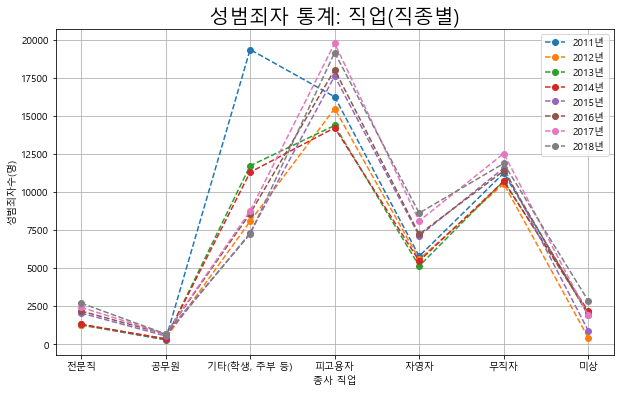

In [10]:
x = ['전문직', '공무원', '기타(학생, 주부 등)', '피고용자', '자영자', '무직자', '미상']
y1 = crime_job_sum_2011.loc['성범죄 전체'][1:]
y2 = crime_job_sum_2012.loc['성범죄 전체'][1:]
y3 = crime_job_sum_2013.loc['성범죄 전체'][1:]
y4 = crime_job_sum_2014.loc['성범죄 전체'][1:]
y5 = crime_job_sum_2015.loc['성범죄 전체'][1:]
y6 = crime_job_sum_2016.loc['성범죄 전체'][1:]
y7 = crime_job_sum_2017.loc['성범죄 전체'][1:]
y8 = crime_job_sum_2018.loc['성범죄 전체'][1:]


plt.figure(figsize=(10,6))
plt.title('성범죄자 통계: 직업(직종별)', size=20)
plt.xlabel('종사 직업')
plt.ylabel('성범죄자수(명)')
plt.grid()


plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')


plt.legend()

plt.show()

## 전문직

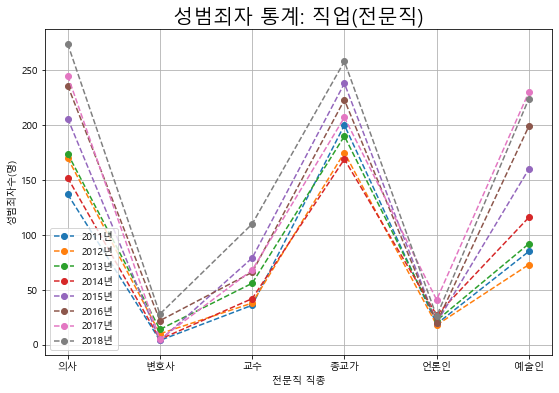

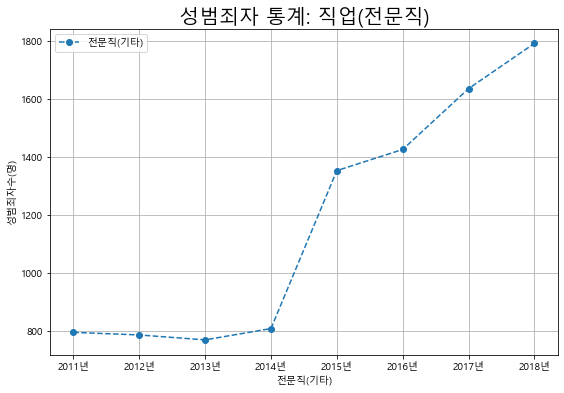

In [11]:
x = ['의사', '변호사', '교수', '종교가', '언론인', '예술인']
y1 = crime_job_prof_2011.loc['성범죄 전체'][:-1]
y2 = crime_job_prof_2012.loc['성범죄 전체'][:-1]
y3 = crime_job_prof_2013.loc['성범죄 전체'][:-1]
y4 = crime_job_prof_2014.loc['성범죄 전체'][:-1]
y5 = crime_job_prof_2015.loc['성범죄 전체'][:-1]
y6 = crime_job_prof_2016.loc['성범죄 전체'][:-1]
y7 = crime_job_prof_2017.loc['성범죄 전체'][:-1]
y8 = crime_job_prof_2018.loc['성범죄 전체'][:-1]

plt.figure(figsize=(20,6)).add_subplot(1, 2, 1)
plt.title('성범죄자 통계: 직업(전문직)', size=20)
plt.xlabel('전문직 직종')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend(loc='best')

#######################################################################
x11 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
y11 = [crime_job_prof_2011.loc['성범죄 전체'][-1], 
       crime_job_prof_2012.loc['성범죄 전체'][-1], 
       crime_job_prof_2013.loc['성범죄 전체'][-1], 
       crime_job_prof_2014.loc['성범죄 전체'][-1], 
       crime_job_prof_2015.loc['성범죄 전체'][-1], 
       crime_job_prof_2016.loc['성범죄 전체'][-1], 
       crime_job_prof_2017.loc['성범죄 전체'][-1], 
       crime_job_prof_2018.loc['성범죄 전체'][-1]]

plt.figure(figsize=(20,6)).add_subplot(1, 2, 2)
plt.title('성범죄자 통계: 직업(전문직)', size=20)
plt.xlabel('전문직(기타)')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x11, y11, label='전문직(기타)', marker='o', linestyle='dashed')

plt.legend()

plt.show()

#### 대학가 미투 운동? -- 2018년 '교수'

## 기타 직종

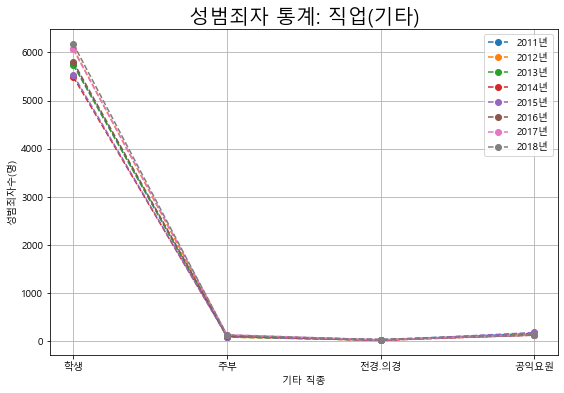

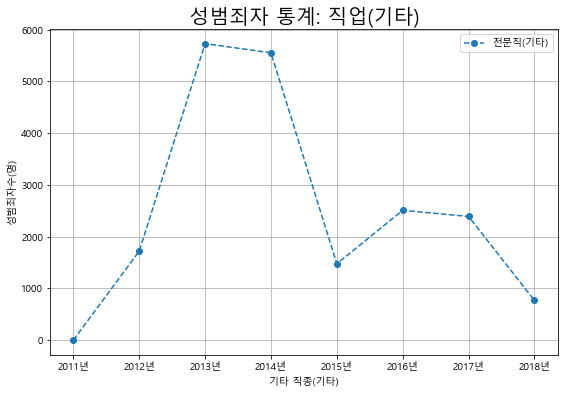

In [12]:
x = ['학생', '주부', '전경.의경', '공익요원']
y1 = crime_job_rest_2011.loc['성범죄 전체'][:-1]
y2 = crime_job_rest_2012.loc['성범죄 전체'][:-1]
y3 = crime_job_rest_2013.loc['성범죄 전체'][:-1]
y4 = crime_job_rest_2014.loc['성범죄 전체'][:-1]
y5 = crime_job_rest_2015.loc['성범죄 전체'][:-1]
y6 = crime_job_rest_2016.loc['성범죄 전체'][:-1]
y7 = crime_job_rest_2017.loc['성범죄 전체'][:-1]
y8 = crime_job_rest_2018.loc['성범죄 전체'][:-1]

plt.figure(figsize=(20,6)).add_subplot(1, 2, 1)
plt.title('성범죄자 통계: 직업(기타)', size=20)
plt.xlabel('기타 직종')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend(loc='best')

#######################################################################
x22 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
y22 = [crime_job_rest_2011.loc['성범죄 전체'][-1], 
       crime_job_rest_2012.loc['성범죄 전체'][-1], 
       crime_job_rest_2013.loc['성범죄 전체'][-1], 
       crime_job_rest_2014.loc['성범죄 전체'][-1], 
       crime_job_rest_2015.loc['성범죄 전체'][-1], 
       crime_job_rest_2016.loc['성범죄 전체'][-1], 
       crime_job_rest_2017.loc['성범죄 전체'][-1], 
       crime_job_rest_2018.loc['성범죄 전체'][-1]]

plt.figure(figsize=(20,6)).add_subplot(1, 2, 2)
plt.title('성범죄자 통계: 직업(기타)', size=20)
plt.xlabel('기타 직종(기타)')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x22, y22, label='전문직(기타)', marker='o', linestyle='dashed')

plt.legend()

plt.show()

## 피고용자

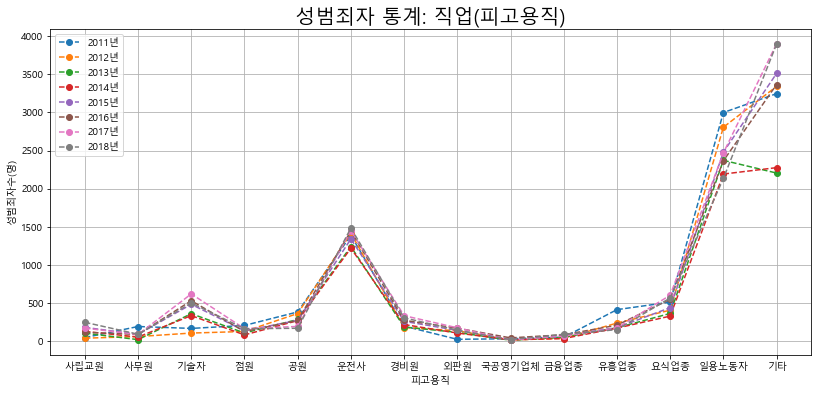

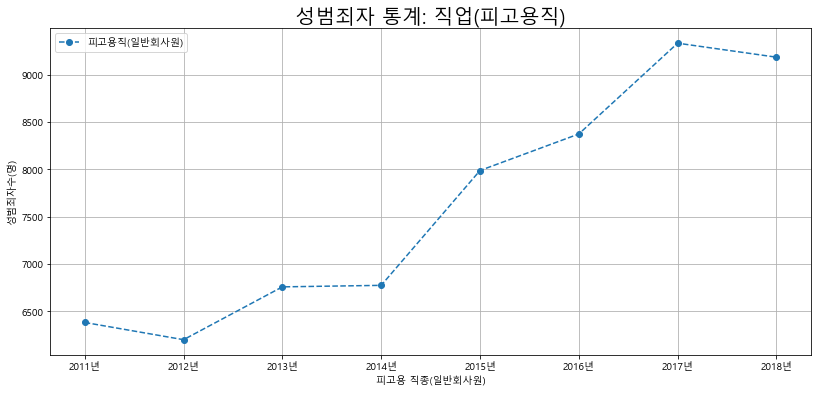

In [13]:
#2번째
x33 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
y33 = [crime_job_empl_2011.loc['성범죄 전체'][9], 
       crime_job_empl_2012.loc['성범죄 전체'][9], 
       crime_job_empl_2013.loc['성범죄 전체'][9], 
       crime_job_empl_2014.loc['성범죄 전체'][9], 
       crime_job_empl_2015.loc['성범죄 전체'][9], 
       crime_job_empl_2016.loc['성범죄 전체'][9], 
       crime_job_empl_2017.loc['성범죄 전체'][9], 
       crime_job_empl_2018.loc['성범죄 전체'][9]]

del crime_job_empl_2011['피고용자(일반회사원)']
del crime_job_empl_2012['피고용자(일반회사원)']
del crime_job_empl_2013['피고용자(일반회사원)']
del crime_job_empl_2014['피고용자(일반회사원)']
del crime_job_empl_2015['피고용자(일반회사원)']
del crime_job_empl_2016['피고용자(일반회사원)']
del crime_job_empl_2017['피고용자(일반회사원)']
del crime_job_empl_2018['피고용자(일반회사원)']



x = ['사립교원', '사무원', '기술자', '점원', '공원', '운전사', '경비원', '외판원', 
    '국공영기업체', '금융업종', '유흥업종', '요식업종', 
    '일용노동자', '기타']
y1 = crime_job_empl_2011.loc['성범죄 전체']
y2 = crime_job_empl_2012.loc['성범죄 전체']
y3 = crime_job_empl_2013.loc['성범죄 전체']
y4 = crime_job_empl_2014.loc['성범죄 전체']
y5 = crime_job_empl_2015.loc['성범죄 전체']
y6 = crime_job_empl_2016.loc['성범죄 전체']
y7 = crime_job_empl_2017.loc['성범죄 전체']
y8 = crime_job_empl_2018.loc['성범죄 전체']

plt.figure(figsize=(30,6)).add_subplot(1, 2, 1)
plt.title('성범죄자 통계: 직업(피고용직)', size=20)
plt.xlabel('피고용직')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend()

#######################################################################

plt.figure(figsize=(30,6)).add_subplot(1, 2, 2)
plt.title('성범죄자 통계: 직업(피고용직)', size=20)
plt.xlabel('피고용 직종(일반회사원)')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x33, y33, label='피고용직(일반회사원)', marker='o', linestyle='dashed')


plt.legend()

plt.show()

## 자영업

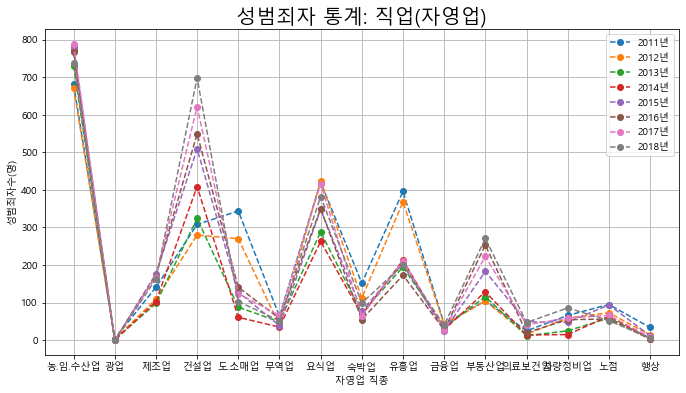

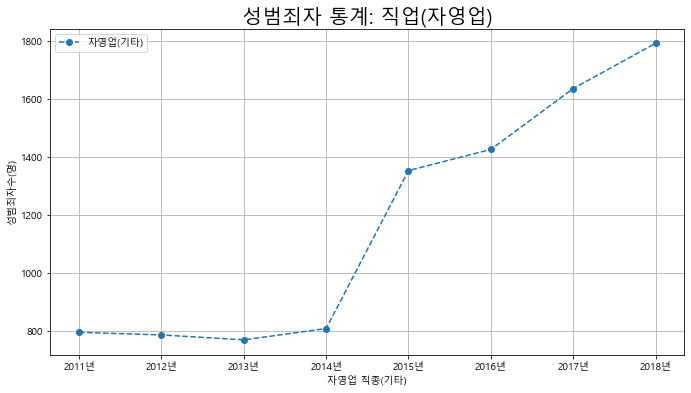

In [14]:
x = ['농.임.수산업', '광업', '제조업', '건설업', '도.소매업', '무역업', '요식업', '숙박업', 
    '유흥업', '금융업', '부동산업', '의료보건업', '차량정비업', '노점', '행상']
y1 = crime_job_self_2011.loc['성범죄 전체'][:-1]
y2 = crime_job_self_2012.loc['성범죄 전체'][:-1]
y3 = crime_job_self_2013.loc['성범죄 전체'][:-1]
y4 = crime_job_self_2014.loc['성범죄 전체'][:-1]
y5 = crime_job_self_2015.loc['성범죄 전체'][:-1]
y6 = crime_job_self_2016.loc['성범죄 전체'][:-1]
y7 = crime_job_self_2017.loc['성범죄 전체'][:-1]
y8 = crime_job_self_2018.loc['성범죄 전체'][:-1]

plt.figure(figsize=(25,6)).add_subplot(1, 2, 1)
plt.title('성범죄자 통계: 직업(자영업)', size=20)
plt.xlabel('자영업 직종')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend(loc='best')

#######################################################################
x44 = ['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
y44 = [crime_job_prof_2011.loc['성범죄 전체'][-1], 
       crime_job_prof_2012.loc['성범죄 전체'][-1], 
       crime_job_prof_2013.loc['성범죄 전체'][-1], 
       crime_job_prof_2014.loc['성범죄 전체'][-1], 
       crime_job_prof_2015.loc['성범죄 전체'][-1], 
       crime_job_prof_2016.loc['성범죄 전체'][-1], 
       crime_job_prof_2017.loc['성범죄 전체'][-1], 
       crime_job_prof_2018.loc['성범죄 전체'][-1]]

plt.figure(figsize=(25,6)).add_subplot(1, 2, 2)
plt.title('성범죄자 통계: 직업(자영업)', size=20)
plt.xlabel('자영업 직종(기타)')
plt.ylabel('성범죄자수(명)')
plt.grid()

plt.plot(x44, y44, label='자영업(기타)', marker='o', linestyle='dashed')

plt.legend()

plt.show()